In [ ]:
pip install st-dbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.9/414.9 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for st-dbscan: filename=st_dbscan-0.2.2-py2.py3-none-any.whl size=6847 sha256=ef5346ab4ca49a4e1b0afe75ebe09b4bf05fb8a7c33f9ad19bc5fe6745af6314
  Stored in directory: /root/.cache/pip/wheels/c5/fe/0d/cf118a578d5e619ab04ddd9669412fb5cf3b973b7abe6a3088
Successfully built st-dbscan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from st_dbscan import ST_DBSCAN
import matplotlib as mpl

In [ ]:
gj = gpd.read_file("/content/weatherdb_categories_hagel.geojson")

In [ ]:
gj

,fid,meldungId,crowdDeviceId,place,timestamp,submissionTimestamp,category,auspraegung,zusatzAttribute,comment,...,qualityCheckPassed,missingValidationData,qualityCheckMsg,timesReportedForImage,timesReportedForWeather,userType,sourceVersion,source,imageLabels,geometry
0,1,196314,f047ad4b-16c4-4bfe-9864-6c70ac1b0992,Waldkirch,1623354665000,1654011346865,HAGEL,HAGEL_UNTER_1CM,,None,...,False,False,meldung timestamp is outside the supported ran...,0,0,NORMAL,android-2.15,MeteoSwissApp,"{'labels': [{'name': 'Nature', 'confidence': 9...",POINT (9.29500 47.47000)
1,2,181000,F11F5502-31FD-4899-A4C2-26411659069A,Schwarzenburg,1624460400000,1653077437581,HAGEL,HAGEL_5CM,,"Alte Erfassung, da App bisher nicht bekannt. D...",...,False,False,meldung timestamp is outside the supported ran...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (7.34000 46.82000)
2,3,149243,f980f506-e2be-4891-9889-38e7e492e6f7,La Russille,1629428400000,1649431486226,HAGEL,HAGEL_UEBER_7CM,"HAGEL_GESCHLOSSENE_HAGELDECKE,HAGEL_SCHADEN_ZE...",,...,False,False,meldung timestamp is outside the supported ran...,0,0,NORMAL,android-2.15,MeteoSwissApp,None,POINT (6.48000 46.73500)
3,4,185330,3E787EAD-5F2D-4629-8438-5A7998CCC784,Walzenhausen,1635061870000,1653307483683,HAGEL,HAGEL_1CM,,None,...,False,False,image contains humans\nmeldung timestamp is ou...,0,0,NORMAL,ios-2.15,MeteoSwissApp,"{'labels': [{'name': 'Nature', 'confidence': 9...",POINT (9.60500 47.44500)
4,5,155480,B1F29933-FEFE-414C-95F5-B58D81B61B02,Adligenswil,1635684099193,1650500479226,HAGEL,HAGEL_2CM,HAGEL_SCHADEN_ZERSTOERERISCH,None,...,False,False,image contains humans\nmeldung timestamp is ou...,0,0,NORMAL,ios-2.15,MeteoSwissApp,"{'labels': [{'name': 'Face', 'confidence': 99....",POINT (8.36500 47.07000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12651,12652,197619,4A91CC8B-5509-4363-9283-4DA1A7341A9A,Wangs,1654185140914,1654185161802,HAGEL,HAGEL_2CM,,None,...,False,True,image contains humans\nvalidation with weather...,0,0,NORMAL,ios-2.15,MeteoSwissApp,"{'labels': [{'name': 'Nature', 'confidence': 9...",POINT (9.43500 47.03500)
12652,12653,197627,F57A6F9F-6C1B-4909-925D-9029BCDE25A9,Belp,1654186534680,1654186576040,HAGEL,HAGEL_UNTER_1CM,,None,...,False,False,validation with weather data [DBImage{type=RAD...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (7.50000 46.89000)
12653,12654,197608,CAB2C051-1B09-4484-8462-4694576E7A84,Gonten,1654183909643,1654183918812,HAGEL,HAGEL_UNTER_1CM,,None,...,False,False,validation with weather data [DBImage{type=RAD...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (9.34500 47.33000)
12654,12655,197611,998197E0-D8DE-48A0-851B-99864AC92947,Konstanz,1654184438552,1654184442845,HAGEL,HAGEL_UEBER_7CM,,None,...,False,False,validation with weather data [DBImage{type=RAD...,0,0,NORMAL,ios-2.15,MeteoSwissApp,None,POINT (9.17500 47.66000)


In [ ]:
def getdata(geojson):
  coords = geojson.geometry.get_coordinates(ignore_index=True)
  coords["time"] =gj["timestamp"]
  coords = coords.dropna(how='any')
  coords = coords[coords['x'] > 0]
  coords = coords[coords['x'] < 20]
  coords = coords[coords['y'] > 0]
  data = coords.loc[:, ['time','x','y']].values
  return coords, data

In [ ]:
coords, data = getdata(gj)

In [ ]:
data

array([[1.62335466e+12, 9.29500000e+00, 4.74700000e+01],
       [1.62446040e+12, 7.34000000e+00, 4.68200000e+01],
       [1.62942840e+12, 6.48000000e+00, 4.67350000e+01],
       ...,
       [1.65418391e+12, 9.34500000e+00, 4.73300000e+01],
       [1.65418444e+12, 9.17500000e+00, 4.76600000e+01],
       [1.65418690e+12, 6.37500000e+00, 4.60550000e+01]])

In [ ]:
# instantiating DBSCAN
st_dbscan = ST_DBSCAN(eps1 = 10, eps2 = 1000000, min_samples = 5)
# fitting model
model=st_dbscan.fit(data)

In [ ]:
set(st_dbscan.labels)

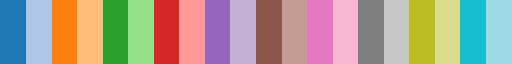

In [ ]:
mpl.colormaps['tab20']

In [ ]:
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]

        clust = data[np.where(labels==i)]


        ax.scatter(clust[:,1], clust[:,2], clust[:,0],c=[col], s=1)
    plt.show()

    return None

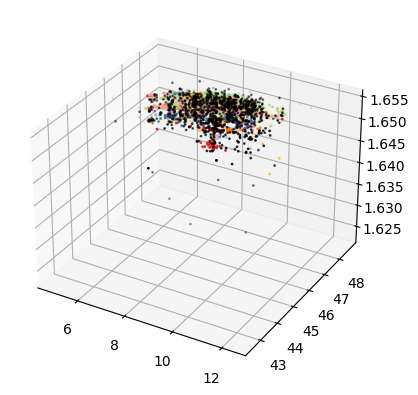

In [ ]:
plot(data, st_dbscan.labels)

In [ ]:
from scipy.stats import gaussian_kde

In [ ]:
def densitygraph(coords,timeframe):
  #data1 = coords[max(coords['time'])-86400000 > coords['time']]
  data1 = coords[coords['time'] > max(coords['time'])-timeframe]
  print(data1)
  data1 = data1.drop('time', axis=1)
  data2 = np.vstack([data1['x'],data1['y']])
  z = gaussian_kde(data2)(data2)
  idx = z.argsort()
  fig, ax = plt.subplots()
  ax.scatter(data1['x'], data1['y'], c=z, s=100)
  plt.show()

           x       y           time
12526  6.195  46.325  1654108200000
12527  6.075  46.320  1654110000000
12528  5.990  46.255  1654110536632
12529  6.085  46.320  1654110708850
12530  6.175  46.380  1654110720000
...      ...     ...            ...
12651  9.435  47.035  1654185140914
12652  7.500  46.890  1654186534680
12653  9.345  47.330  1654183909643
12654  9.175  47.660  1654184438552
12655  6.375  46.055  1654186901566

[129 rows x 3 columns]


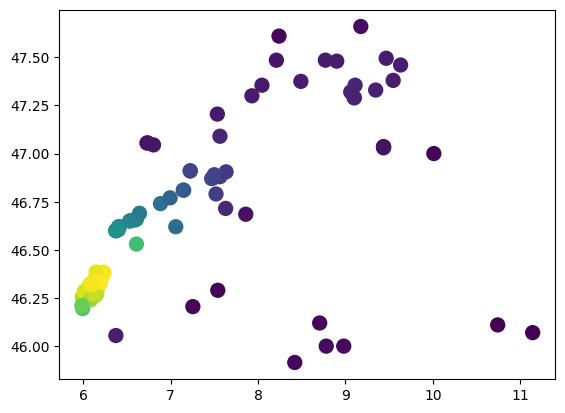

In [ ]:
densitygraph(coords,86400000)

In [ ]:
gjclouds = gpd.read_file("/content/weatherdb_categories_bewoelkung.geojson")

In [ ]:
coordscloud, datacloud = getdata(gjclouds)

In [ ]:
datacloud

array([[1.62335466e+12, 1.03000000e+01, 4.67950000e+01],
       [1.62446040e+12, 9.10500000e+00, 4.63400000e+01],
       [1.62942840e+12, 8.56000000e+00, 4.73550000e+01],
       ...,
       [1.65418391e+12, 8.48000000e+00, 4.76600000e+01],
       [1.65418444e+12, 7.29000000e+00, 4.62400000e+01],
       [1.65418690e+12, 6.57500000e+00, 4.69050000e+01]])

In [ ]:
# instantiating DBSCAN
st_dbscancloud = ST_DBSCAN(eps1 = 0.5, eps2 = 600000, min_samples = 2)
# fitting model
modelclouds=st_dbscancloud.fit(datacloud)
set(st_dbscancloud.labels)

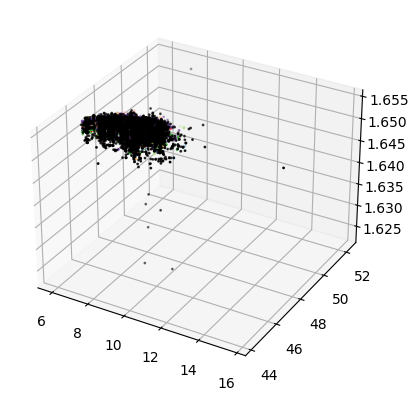

In [ ]:
plot(datacloud, st_dbscancloud.labels)

           x       y          time
12615  7.035  46.855  1.654140e+12
12616  6.300  46.430  1.654141e+12
12617  7.150  46.830  1.654143e+12
12618  7.540  47.635  1.654145e+12
12619  9.025  46.195  1.654146e+12
12620  7.080  46.785  1.654146e+12
12621  6.605  46.540  1.654146e+12
12622  8.420  46.820  1.654147e+12
12623  9.530  47.440  1.654150e+12
12624  8.515  47.155  1.654157e+12
12625  8.450  47.175  1.654158e+12
12626  7.410  47.200  1.654160e+12
12627  9.140  45.455  1.654160e+12
12628  9.060  45.795  1.654161e+12
12629  7.750  46.010  1.654162e+12
12630  6.735  46.535  1.654164e+12
12631  8.755  47.305  1.654166e+12
12632  6.540  46.580  1.654168e+12
12633  7.505  46.935  1.654171e+12
12634  8.490  47.405  1.654171e+12
12635  8.490  47.405  1.654174e+12
12636  7.445  47.020  1.654175e+12
12637  6.065  46.220  1.654175e+12
12638  7.770  47.470  1.654177e+12
12639  8.490  47.385  1.654175e+12
12640  9.685  45.685  1.654178e+12
12641  8.600  47.220  1.654179e+12
12642  6.110  46.225

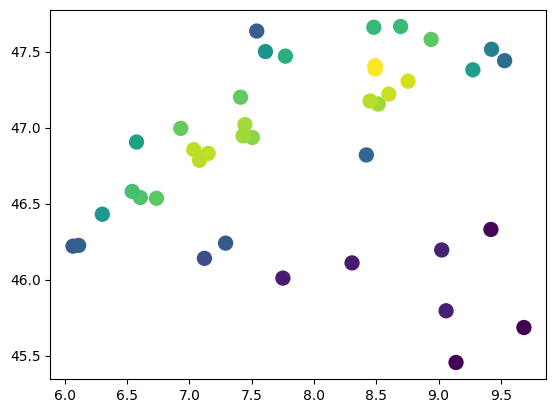

In [ ]:
densitygraph(coordscloud,50000000)

           x       y          time
12475  8.550  47.375  1.653936e+12
12476  6.230  46.605  1.653946e+12
12477  8.335  47.350  1.653953e+12
12478  9.140  47.445  1.653967e+12
12479  6.850  46.505  1.653972e+12
...      ...     ...           ...
12651  9.420  46.330  1.654185e+12
12652  9.275  47.380  1.654187e+12
12653  8.480  47.660  1.654184e+12
12654  7.290  46.240  1.654184e+12
12655  6.575  46.905  1.654187e+12

[181 rows x 3 columns]


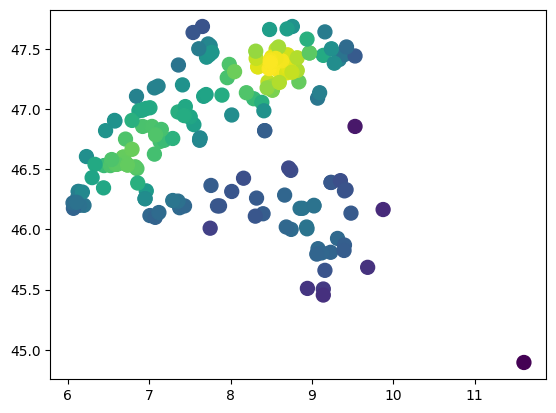

In [ ]:
densitygraph(coordscloud,259200000)